In [5]:
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# 讀取 TeleQnA.txt
input_file = r"C:\Users\bmwlab\Desktop\tele-llm-eval\TeleQnA\TeleQnA.txt"
output_dir = r"C:\Users\bmwlab\Desktop\tele-llm-eval\Category_of_TeleQnA"

In [7]:
print(f"Reading file: {input_file}")
try:
    with open(input_file, encoding="utf-8") as f:
        all_questions = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found {input_file}")
    exit()

# Group by category
category_dict = defaultdict(dict)

for q_id, q_data in all_questions.items():
    category = q_data.get('category', 'Uncategorized')
    category_dict[category][q_id] = q_data

# Create output directory
os.makedirs(output_dir, exist_ok=True)
print(f"Creating output directory: {output_dir}")


Reading file: C:\Users\bmwlab\Desktop\tele-llm-eval\TeleQnA\TeleQnA.txt
Creating output directory: C:\Users\bmwlab\Desktop\tele-llm-eval\Category_of_TeleQnA


Saved: Standards_specifications_TeleQnA.txt (2000 questions)
Saved: Research_publications_TeleQnA.txt (4500 questions)
Saved: Research_overview_TeleQnA.txt (2000 questions)
Saved: Lexicon_TeleQnA.txt (500 questions)
Saved: Standards_overview_TeleQnA.txt (1000 questions)

Text classification completed! Total 5 categories
Total questions: 10000

Generating pie chart...
Chart saved: C:\Users\bmwlab\Desktop\tele-llm-eval\Category_of_TeleQnA\category_distribution_pie.png


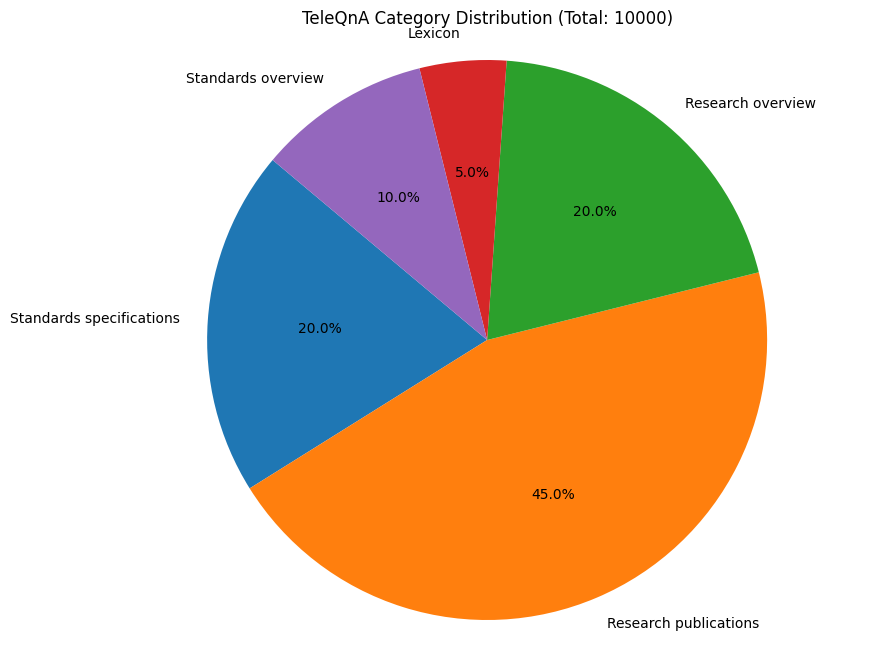

In [8]:
# Prepare plotting data
labels = []
sizes = []

# Save each category and collect data
for category, questions in category_dict.items():
    # 1. Process text file output
    # Replace spaces and special characters in category with underscores
    safe_category = category.replace(' ', '_').replace('/', '_')
    output_file = os.path.join(output_dir, f"{safe_category}_TeleQnA.txt")
    
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(questions, f, indent=4, ensure_ascii=False)
    
    print(f"Saved: {safe_category}_TeleQnA.txt ({len(questions)} questions)")
    
    # 2. Collect plotting data (use original category name as label)
    labels.append(category)
    sizes.append(len(questions))

print(f"\nText classification completed! Total {len(category_dict)} categories")
print(f"Total questions: {len(all_questions)}")

# --- Draw pie chart ---
print("\nGenerating pie chart...")

plt.figure(figsize=(10, 8)) # Set figure size

# Draw pie chart
# autopct='%1.1f%%' displays percentage
# startangle=140 sets the starting angle for better orientation
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title(f'TeleQnA Category Distribution (Total: {len(all_questions)})')
plt.axis('equal')  # Ensure pie chart is a circle

# Save chart
chart_filename = os.path.join(output_dir, "category_distribution_pie.png")
plt.savefig(chart_filename)
print(f"Chart saved: {chart_filename}")

# Uncomment below line to display in window if running locally
# plt.show()

In [9]:
import json
import os
import glob

# Set the directory containing the category files
output_dir = r"C:\Users\bmwlab\Desktop\tele-llm-eval\Category_of_TeleQnA"

# Get all category files
category_files = glob.glob(os.path.join(output_dir, "*_TeleQnA.txt"))

print(f"Found {len(category_files)} category files to process:")
for file_path in category_files:
    print(f"  - {os.path.basename(file_path)}")

# Process each file
for file_path in category_files:
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Create new dictionary with renumbered questions
    renumbered_data = {}
    question_number = 1
    
    # Sort by original question number before renumbering
    sorted_questions = sorted(data.items(), key=lambda x: int(x[0].split()[1]))
    
    for old_key, question_data in sorted_questions:
        new_key = f"question {question_number}"
        renumbered_data[new_key] = question_data
        question_number += 1
    
    # Write back to file
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(renumbered_data, f, indent=4, ensure_ascii=False)
    
    print(f"\nProcessed {os.path.basename(file_path)}: renumbered {len(renumbered_data)} questions")

print("\nAll files have been renumbered successfully!")


Found 5 category files to process:
  - Lexicon_TeleQnA.txt
  - Research_overview_TeleQnA.txt
  - Research_publications_TeleQnA.txt
  - Standards_overview_TeleQnA.txt
  - Standards_specifications_TeleQnA.txt

Processed Lexicon_TeleQnA.txt: renumbered 500 questions

Processed Research_overview_TeleQnA.txt: renumbered 2000 questions

Processed Research_publications_TeleQnA.txt: renumbered 4500 questions

Processed Standards_overview_TeleQnA.txt: renumbered 1000 questions

Processed Standards_specifications_TeleQnA.txt: renumbered 2000 questions

All files have been renumbered successfully!
